<a href="https://colab.research.google.com/github/hshkuli/hshkuli/blob/main/imgclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy
from tensorflow import keras
from keras.constraints import max_norm
from tensorflow.python.keras import utils
from keras import utils as np_utils
from keras.src.utils.np_utils import to_categorical
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.preprocessing.text import text_to_word_sequence
import pandas as pd
from keras.preprocessing.text import Tokenizer
import numpy as np
# from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix


In [2]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[0]

array([6], dtype=uint8)

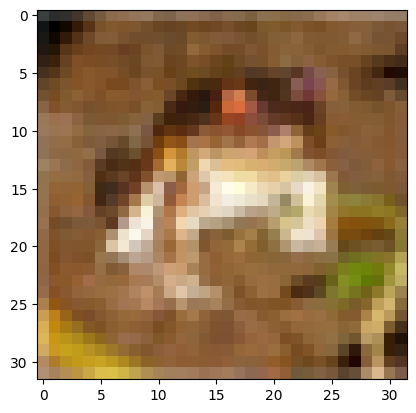

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0


In [7]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [9]:
num_class = y_test.shape[1] #10

In [10]:
x_train.shape[1:]

(32, 32, 3)

## **buliding the model**

In [24]:
model = Sequential()
model.add(keras.layers.Conv2D(32,(3,3), padding= 'same', input_shape = x_train.shape[1:], activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(keras.layers.Conv2D(64,(3,3), padding= 'same', activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(keras.layers.Conv2D(64,(3,3), padding= 'same', activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(keras.layers.Conv2D(128,(3,3), padding= 'same', activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_class, activation = 'softmax'))

In [25]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 64)       

### **# training the model**

In [27]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
782/782 [==============================] - 17s 15ms/step - loss: 1.6140 - accuracy: 0.4245 - val_loss: 1.3026 - val_accuracy: 0.5345
Epoch 2/30
782/782 [==============================] - 12s 15ms/step - loss: 1.1789 - accuracy: 0.5824 - val_loss: 1.0035 - val_accuracy: 0.6463
Epoch 3/30
782/782 [==============================] - 11s 13ms/step - loss: 1.0190 - accuracy: 0.6421 - val_loss: 0.8393 - val_accuracy: 0.7061
Epoch 4/30
782/782 [==============================] - 11s 14ms/step - loss: 0.9262 - accuracy: 0.6747 - val_loss: 0.8074 - val_accuracy: 0.7239
Epoch 5/30
782/782 [==============================] - 10s 13ms/step - loss: 0.8656 - accuracy: 0.6975 - val_loss: 0.7409 - val_accuracy: 0.7399
Epoch 6/30
782/782 [==============================] - 10s 13ms/step - loss: 0.8268 - accuracy: 0.7133 - val_loss: 0.7728 - val_accuracy: 0.7305
Epoch 7/30
782/782 [==============================] - 10s 13ms/step - loss: 0.7822 - accuracy: 0.7286 - val_loss: 0.6905 - val_accuracy:

In [28]:
for key,val in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


In [29]:
import pandas as pd

<Axes: >

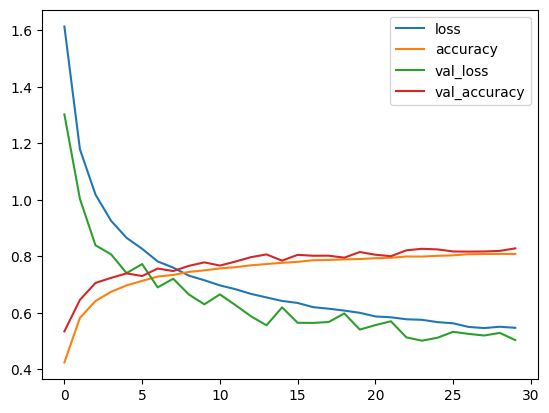

In [30]:
pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show(close=None, block=None)>

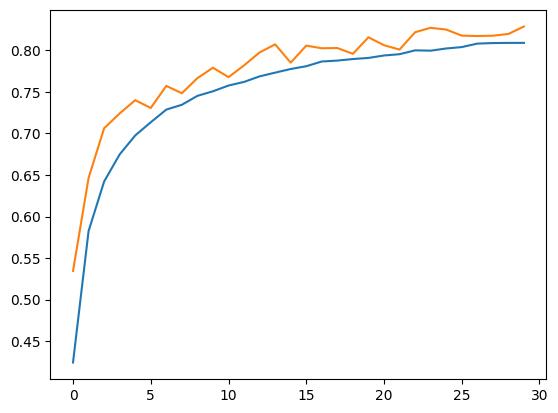

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show


In [32]:
model.save('CNN_cifar10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
model.save('my_model.keras')

In [34]:
model2 = load_model('CNN_cifar10.h5')

In [49]:
labels  = ['airplane', 'automobile', 'bird', 'cat', 'dear', 'dog', 'frog', 'horse', 'ship', 'truck' ]

In [43]:
import numpy as np
import seaborn as sns; sns.set()

In [47]:
np.argmax(model2.predict(x_test[0:10])[0])


1/1 [==============================] - 0s 49ms/step


3

In [37]:
model2.predict(x_test[0:10])[0]

1/1 [==============================] - 0s 26ms/step


array([1.3801886e-03, 3.0074787e-05, 1.6258564e-03, 7.4580640e-01,
       4.3599186e-05, 2.4486719e-01, 5.8353399e-03, 1.7161571e-04,
       2.2815383e-04, 1.1632765e-05], dtype=float32)

In [39]:
label[3]

'cat'

In [41]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

313/313 [==============================] - 1s 2ms/step


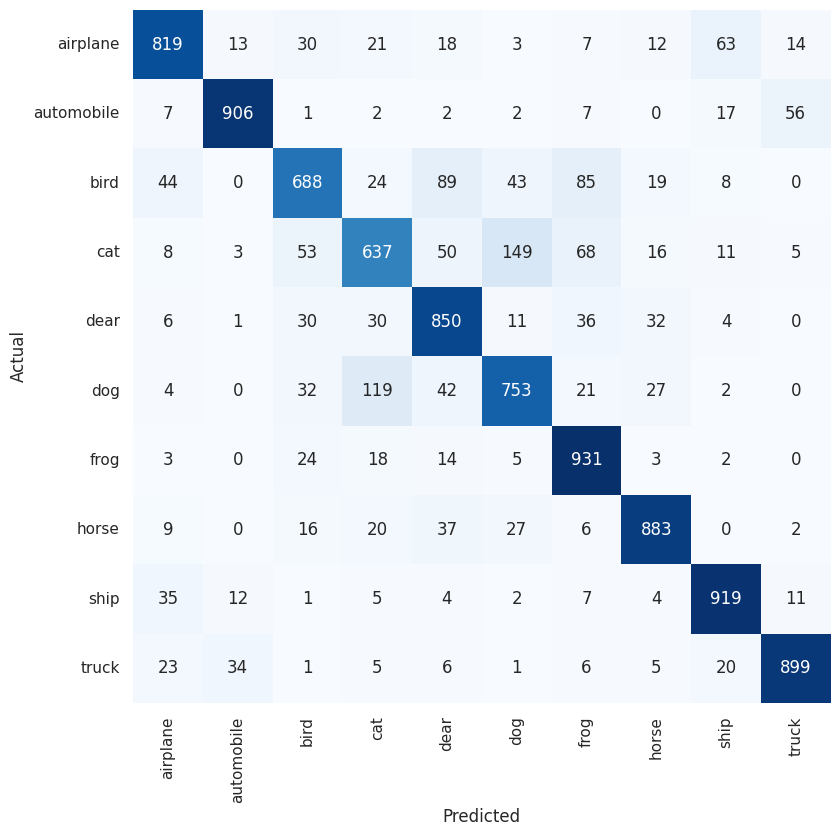

In [53]:

# Predicting test data
predictions = model.predict(x_test)

predictions = np.argmax(predictions, axis = 1)

y_test = np.argmax(y_test, axis = 1)


# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

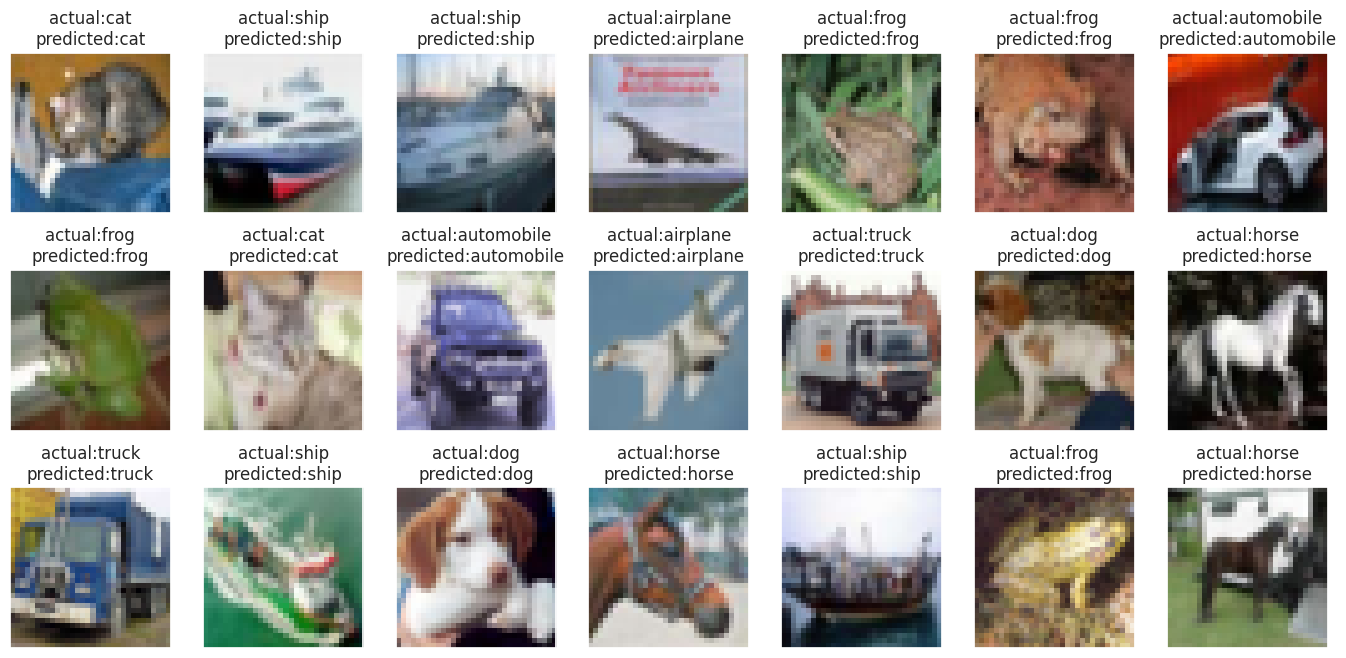

In [55]:

y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index]] + '\n' + 'predicted:' + labels[predictions[index]])
        axes[i,j].imshow(x_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()